In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
df = pd.read_excel('Reg.xlsx')
df.head(5)

,Reaction Time,apology,Topic,actions,rebound_incident,rebound_apology
0,2,1,Racial,1,3,2
1,1,0,Databreach,1,2,1
2,1,1,Racial,0,3,2
3,1,1,Racial,1,5,4
4,0,1,Racial,0,2,1


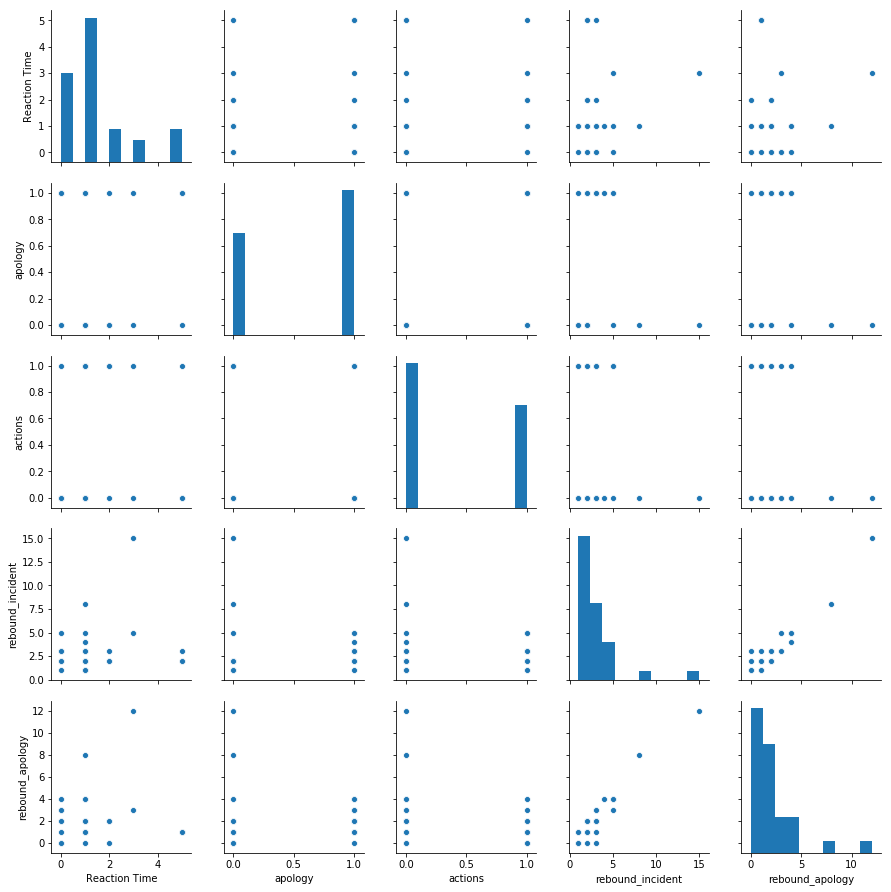

In [14]:
sns.pairplot(df)

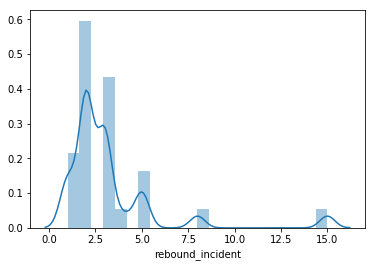

In [16]:
sns.distplot(df['rebound_incident'])

rebound_incident data looks right skewed so let us take log value of it to make it normalized.

In [25]:
df['re']=np.log(df['rebound_incident'])

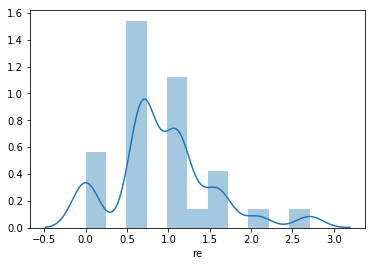

In [26]:
sns.distplot(df['re'])

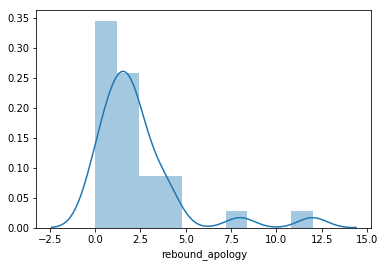

In [27]:
sns.distplot(df['rebound_apology'])

    Even rebound apology looks to be right skewed. However we can't use log function in this as there are zero in the data. 

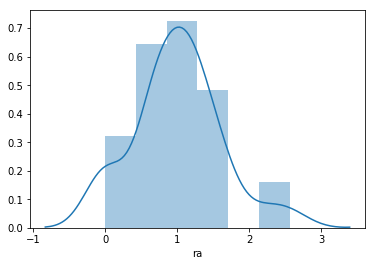

In [40]:
df['ra']=np.log(df['rebound_apology']+1)
sns.distplot(df['ra'])

In [44]:
data = df[['Reaction Time','apology','actions','re','ra']]
data.corr()

,Reaction Time,apology,actions,re,ra
Reaction Time,1.000000,-0.021323,0.116458,0.143986,0.002991
apology,-0.021323,1.000000,0.137255,0.092316,0.038616
actions,0.116458,0.137255,1.000000,-0.112205,-0.272535
re,0.143986,0.092316,-0.112205,1.000000,0.814764
ra,0.002991,0.038616,-0.272535,0.814764,1.000000


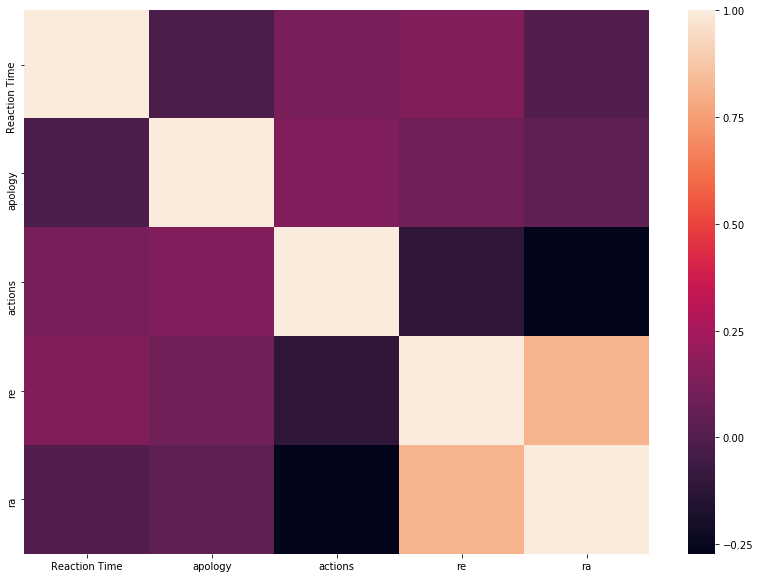

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

ax=sns.heatmap(data.corr())

From above correlation matrix, we see that actions and ra have high correlation so using these two variables will affect our model. Because rebound after apology and rebound after incident are dependent on the date of 

In [78]:
x = data.drop(['re','ra'],axis=1)
y = data[['re']]

Text(0.5, 1.0, 'Linear Relationship doesnot Exists')

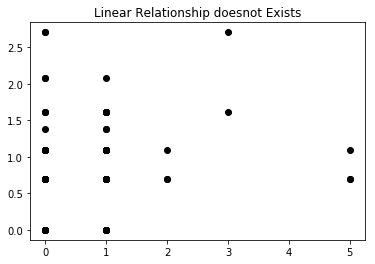

In [79]:
plt.plot(x, y, 'o', color='black');
plt.title("Linear Relationship doesnot Exists")

from the above plot, we see that the model does not conform to Linearity. So it is not necessary to  check other LINE assumptions for the model. So, we are going for non linear models.

In [119]:
ap=pd.get_dummies(x['apology'])
x['apology_0']=ap[0]
x['apology_1']=ap[1]
ac=pd.get_dummies(x['actions'])
x['actions_0']=ac[0]
x['actions_1']=ac[1]
TR = pd.DataFrame(0, index=np.arange(len(df)), columns=['topic_racial'])
TD=  pd.DataFrame(0, index=np.arange(len(df)), columns=['topic_databreach'])
TR[df['Topic']=='Racial']=1
TD[df['Topic']=='Databreach']=1

In [122]:
crisis=x.drop(['apology','actions','apology_racial', 'apology_databreach'], axis=1)
crisis['topic_racial']= TR['topic_racial']
crisis['topic_databreach']= TD['topic_databreach']

In [131]:
crisis

,Reaction Time,apology_0,apology_1,actions_0,actions_1,topic_racial,topic_databreach
0,2,0,1,0,1,1,0
1,1,1,0,0,1,0,1
2,1,0,1,1,0,1,0
3,1,0,1,0,1,1,0
4,0,0,1,1,0,1,0
5,1,0,1,0,1,1,0
6,1,1,0,1,0,0,1
7,5,0,1,1,0,0,1
8,3,0,1,0,1,1,0
9,0,0,1,0,1,0,1


# Decision Tree Regressor:

In [127]:
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.model_selection import cross_val_score
regressor=dt(random_state=0)
reg_dtr=regressor.fit(crisis,y)

In [130]:
reg_dtr.feature_importances_

array([0.72087193, 0.        , 0.20255254, 0.01078106, 0.06021662,
       0.00557785, 0.        ])